<a href="https://colab.research.google.com/github/NencyRathod5418/Blogish/blob/main/exercises/machine-learning/neural-networks/deep_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Networks
You should build an end-to-end machine learning pipeline using a deep learning model. In particular, you should do the following:
- Load the `fashion mnist` dataset from [TensorFlow](https://www.tensorflow.org/tutorials/keras/classification). The loaded dataset is already split into training and test sets.
- Build an end-to-end machine learning pipeline, including a [deep learning](https://www.tensorflow.org/tutorials/keras/classification) model.
- Optimize your pipeline by validating your design decisions.
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [14]:
# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN input: (samples, height, width, channels)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [15]:
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')  # 10 classes
    ])
    return model


In [16]:
model = build_model()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.6959 - loss: 0.8484 - val_accuracy: 0.8587 - val_loss: 0.3933
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.8500 - loss: 0.4263 - val_accuracy: 0.8796 - val_loss: 0.3315
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.8683 - loss: 0.3678 - val_accuracy: 0.8927 - val_loss: 0.3004
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.8821 - loss: 0.3246 - val_accuracy: 0.8964 - val_loss: 0.2788
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 59ms/step - accuracy: 0.8929 - loss: 0.3016 - val_accuracy: 0.8918 - val_loss: 0.2835
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.8992 - loss: 0.2776 - val_accuracy: 0.9028 - val_loss: 0.2707
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 57ms/step - accuracy: 0.9055 - loss: 0.2608 - val_accuracy: 0.9068 - val_loss: 0.2497
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.9088 - loss: 0.2484 - 

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9071 - loss: 0.2718
Test Accuracy: 0.9050


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.87      0.84      0.86      1000
           3       0.90      0.88      0.89      1000
           4       0.80      0.90      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.74      0.71      0.72      1000
           7       0.96      0.97      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.90      0.91     10000
weighted avg       0.91      0.91      0.91     10000



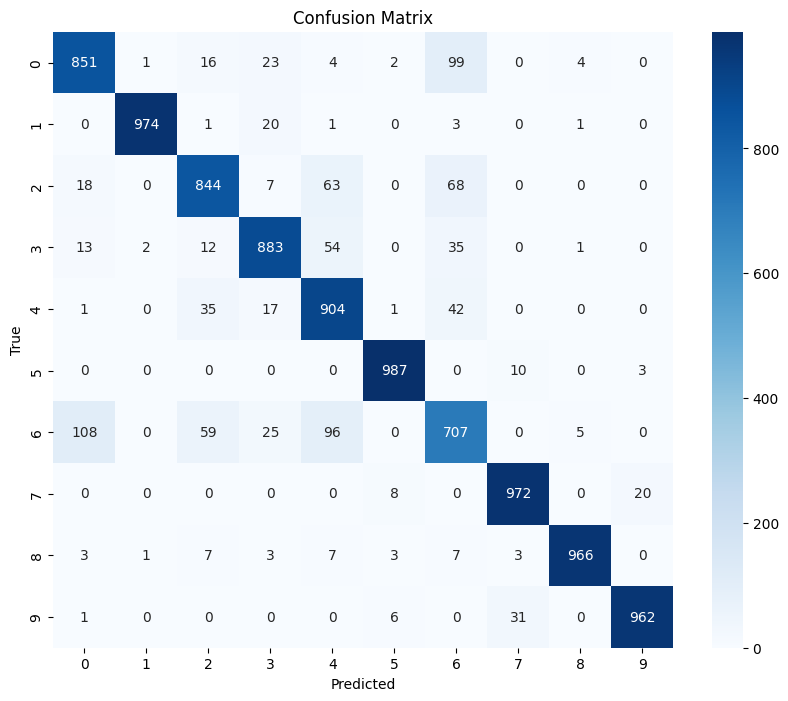

In [19]:
# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
